In [1]:
import tensorflow as tf

In [4]:
from sklearn.datasets import fetch_mldata

In [684]:
data = fetch_mldata('mnist original')

In [685]:
x_data, y_data = data.data[:], data.target[:]

In [686]:
x_data.shape

(70000, 784)

In [687]:
indexes = []
for i in range(x_data.shape[0]):
    if y_data[i] > 5:
        indexes.append(i)

In [688]:
x_data = np.delete(x_data, indexes, axis=0)
y_data = np.delete(y_data, indexes)

In [691]:
x_data.shape, y_data.shape

((42048, 784), (42048,))

In [697]:
np.unique(y_data, return_counts= True)

(array([0., 1., 2., 3., 4., 5.]),
 array([6903, 7877, 6990, 7141, 6824, 6313], dtype=int64))

In [694]:
x_data = x_data/255

In [717]:
x_data = x_data.reshape((x_data.shape[0],height, width, 1))

In [477]:
import numpy as np

In [434]:
import matplotlib.pyplot as plt
%matplotlib inline

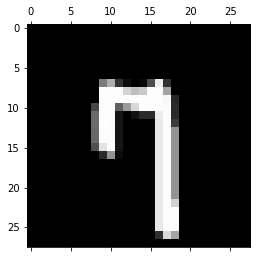

In [459]:
plt.matshow(x_data[67000], cmap = 'gray')
plt.show()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [718]:
sssplit = StratifiedShuffleSplit(random_state= 42)

In [719]:
for x_train_index, x_test_index in sssplit.split(x_data, y_data):
    x_train, y_train = x_data[x_train_index], y_data[x_train_index]
    x_test, y_test = x_data[x_test_index], y_data[x_test_index]

In [720]:
def next_batch(batch_size = 50, x_train = x_train, y_train = y_train):
    prev = 0
    for i in range(batch_size , x_train.shape[0], batch_size):
        yield x_train[prev:i], y_train[prev:i]
        prev = i
    

In [721]:
next(next_batch())[0].shape

(50, 28, 28, 1)

In [722]:
tf.reset_default_graph()

In [723]:
height = 28
width = 28
channels = 1
learning_rate = 0.001
n_epochs = 40
batch_size = 50
data_size = x_train.shape[0]

In [724]:
with tf.name_scope("input"):
    X = tf.placeholder(shape = (None, height, width, channels), dtype = tf.float32)
    y = tf.placeholder(shape = (None), dtype = tf.int32)

In [725]:
he_init = tf.contrib.layers.variance_scaling_initializer()

In [726]:
with tf.name_scope("cnn"):
    conv1 = tf.layers.conv2d(X, filters= 2, kernel_size= 7, strides=[1,1], padding = "SAME", name = "CONV1")
    pool1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "VALID", name = "POOL1")
    conv2 = tf.layers.conv2d(pool1, filters = 3, kernel_size = 3, strides=[2,2], padding = "SAME", name = "CONV2")
    pool2 = tf.nn.avg_pool(conv2, ksize = [1,3,3,1], strides = [1,1,1,1], padding = "VALID", name = "POOL2")
    flatten = tf.layers.flatten(pool2, name = "FLATTEN")
    dense1 = tf.layers.dense(inputs=flatten, units = 20, activation=tf.nn.elu, kernel_initializer= he_init, name = "DENSE1")
    logits = tf.layers.dense(inputs= dense1, units=10, activation = None, kernel_initializer= he_init, name = "LOGITS")

In [727]:
with tf.name_scope("gradients"):
    grad = tf.train.MomentumOptimizer(momentum = 0.9,learning_rate= learning_rate, use_nesterov=True)

In [728]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,labels= y, name = "xENTROPY")
    loss = tf.reduce_mean(xentropy, name = "LOSS")

In [729]:
with tf.name_scope("accuracy"):
    pred = tf.nn.in_top_k(k=1, predictions=logits, targets=y, name = "PREDICTIONS")
    acc = tf.reduce_mean(tf.cast(pred, tf.float32))

In [730]:
with tf.name_scope("training_op"):
    training_op = grad.minimize(loss)

In [732]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [733]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        batch = next_batch(batch_size=batch_size)
        for iteration in range(data_size//batch_size):
            try:
                x_Train, y_Train = next(batch)
            except StopIteration:
                pass
            else:
                sess.run(training_op, feed_dict = {X:x_Train, y: y_Train})
        acc_train = acc.eval(feed_dict = {X: x_Train, y:y_Train})
        acc_test = acc.eval(feed_dict = {X: x_test, y: y_test})
        print("epoch", epoch, "Training accuracy:", acc_train, "Testing accuracy:", acc_test)
    saver.save(sess, './mymodel.ckpt')

epoch 0 Training accuracy: 0.84 Testing accuracy: 0.8416171
epoch 1 Training accuracy: 0.88 Testing accuracy: 0.89298457
epoch 2 Training accuracy: 0.92 Testing accuracy: 0.91034484
epoch 3 Training accuracy: 0.92 Testing accuracy: 0.9210464
epoch 4 Training accuracy: 0.94 Testing accuracy: 0.9300832
epoch 5 Training accuracy: 0.96 Testing accuracy: 0.934126
epoch 6 Training accuracy: 0.96 Testing accuracy: 0.93626636
epoch 7 Training accuracy: 0.96 Testing accuracy: 0.9426873
epoch 8 Training accuracy: 0.98 Testing accuracy: 0.94791913
epoch 9 Training accuracy: 0.98 Testing accuracy: 0.95386446
epoch 10 Training accuracy: 0.98 Testing accuracy: 0.9571938
epoch 11 Training accuracy: 0.98 Testing accuracy: 0.9629013
epoch 12 Training accuracy: 0.98 Testing accuracy: 0.96504164
epoch 13 Training accuracy: 0.98 Testing accuracy: 0.9671819
epoch 14 Training accuracy: 0.98 Testing accuracy: 0.96956
epoch 15 Training accuracy: 0.98 Testing accuracy: 0.97217596
epoch 16 Training accuracy: 0.